# Brownian motion simulations

## Python warm-up

### Exercise 1.1 and 1.2

Calculate sin(0.1) using its taylor expansion to order 5.

Print the result as a descriptive string stating the order expanded to and the value to 25 decimal places. (sheet asks for 5 but with 25 we can see the difference)


The Taylor series expansion for sin(x) is:

$$\sin(x) = x - x^3/3! + x^5/5! - x^7/7! + ...=\sum_{i=0}^{n} \frac{(-1)^i x^{2i+1}}{(2i+1)!}$$






In [1]:
import math # needed for factorial

def taylor_sin(x, n):
    """Calculate sin(x) using Taylor series expansion to order n"""
    result = 0
    for i in range(n+1):
        # Term in Taylor series: (-1)^i * x^(2i+1) / (2i+1)!
        term = ((-1)**i * x**(2*i + 1)) / math.factorial(2*i + 1)
        result += term
    return result

# Calculate sin(0.1) to order 5
x = 0.1
order = 5
result = taylor_sin(x, order)

print(f"sin({x}) expanded to order {order} = {result:.25f}")
print(f"Actual value of sin({x}) = {math.sin(x):.25f}")



sin(0.1) expanded to order 5 = 0.0998334166468281686279695
Actual value of sin(0.1) = 0.0998334166468281547501817


### Exercise 1.3 

Construct a function which returns a list of prime numbers less than a given integer, N.

We use the [Sieve of Eratosthenes](https://en.wikipedia.org/wiki/Sieve_of_Eratosthenes) algorithm.


In [17]:
def get_primes(N):
    """Return a list of prime numbers less than N using the Sieve of Eratosthenes algorithm"""
    # Initialize boolean array "is_prime[0..N]" and mark all entries as true
    is_prime = [True] * N
    is_prime[0] = is_prime[1] = False
    
    # Use Sieve of Eratosthenes to mark non-prime numbers as False
    for i in range(2, int(N**0.5) + 1):
        if is_prime[i]:
            # Update all multiples of i starting from i*i
            for j in range(i*i, N, i): 
                is_prime[j] = False
                
    # Create the list of prime numbers
    primes = [i for i in range(N) if is_prime[i]]
    return primes

# Test the function
N = 121
print(f"Prime numbers less than {N}: {get_primes(N)}")


Prime numbers less than 121: [2, 3, 5, 7, 11, 13, 17, 19, 23, 29, 31, 37, 41, 43, 47, 53, 59, 61, 67, 71, 73, 79, 83, 89, 97, 101, 103, 107, 109, 113]


Note on the line:

```python
for j in range(i*i, N, i):
```

   - `i*i`: Start the loop at \( i^2 \) (the first multiple of \( i \) greater than \( i \) itself).
   - `N`: Go up to (but not including) \( N \).
   - `i`: Use a step size of \( i \) (i.e., \( i, 2i, 3i, \dots \)).

Inside the loop:
   - This loop marks multiples of \( i \) (e.g., \( i, 2i, 3i \), etc.) as non-prime.
   - Starting at \( i^2 \) avoids redundant marking because all smaller multiples of \( i \) will have already been marked by smaller primes.

Example:
   - If \( i = 3 \) and \( N = 10 \), this loop will iterate `j` over values 9 (i.e., \( 3^2 \)) up to but not including \( N \), marking 9 as non-prime.



### Exercise 1.4 

Construct a function which returns a list of the first N terms in the [Recaman's sequence](http://mathworld.wolfram.com/RecamansSequence.html) (see also [here](https://en.wikipedia.org/wiki/Recam%C3%A1n%27s_sequence)).



In [3]:
def recaman_sequence(N):
    sequence = [0]  # Start with the first term of Recaman's sequence

    for i in range(1, N):
        previous = sequence[-1]
        next_term = previous - i  # Calculate the next term as the previous term minus i

        # If the calculated term is positive and not already in the sequence, use it
        if next_term > 0 and next_term not in sequence:
            sequence.append(next_term)
        else:
            # Otherwise, add i to the previous term and use that instead
            sequence.append(previous + i)

    return sequence

# Example usage:
N = 10
print(recaman_sequence(N))  # Output the first 10 terms of the Recaman's sequence


[0, 1, 3, 6, 2, 7, 13, 20, 12, 21]


### Exercise 1.5 
Compute a list of the numbers which appear in both lists when they are both N items long.


It means we have two lists, each containing exactly $N$ items, and we need to find which numbers are common to both lists.


The most inefficient method would involve a nested loop, checking each element in the first list against each element in the second list. This approach has $O(N^2)$ time complexity, as each item in the first list is compared with every item in the second list.


Let us make two lists to play around.

In [20]:
import random
N = 10
list1 = random.sample(range(1, N * 2), N)
list2 = random.sample(range(1, N * 2), N)
list1, list2

([19, 7, 9, 11, 12, 2, 6, 8, 18, 15], [5, 19, 9, 16, 1, 8, 12, 2, 14, 7])

In [21]:
def inefficient_common_elements(list1, list2):
    common_elements = []
    for item1 in list1:
        for item2 in list2:
            if item1 == item2 and item1 not in common_elements:
                common_elements.append(item1)
    return common_elements


In [22]:
%%time
inefficient_common_elements(list1, list2)

CPU times: user 15 µs, sys: 1 µs, total: 16 µs
Wall time: 23.1 µs


[19, 7, 9, 12, 2, 8]

Bad because:
1. **Nested Loop**: For each element in `list1`, the function iterates over every element in `list2`.
2. **Duplicate Check**: Each time a match is found, the function checks if the element is already in `common_elements`, which adds another layer of inefficiency.
3. **Performance**: This implementation is extremely slow for large lists because of the quadratic time complexity and the extra membership check.


The most efficient method is to use set intersection, with hash-based data structure `set` for average \( O(1) \) lookup time. This reduces the time complexity to \( O(N) \), as converting lists to sets and performing intersection operations are efficient.

Here’s the efficient implementation:


In [23]:
def efficient_common_elements(list1, list2):
    return list(set(list1) & set(list2))

In [31]:
%%time
efficient_common_elements(list1, list2)


CPU times: user 24 µs, sys: 3 µs, total: 27 µs
Wall time: 34.8 µs


[2, 7, 8, 9, 12, 19]

In [25]:
timeit -n 1000 efficient_common_elements(list1, list2)

1.45 µs ± 509 ns per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


Efficient because:
1. **Set Conversion**: Converting each list to a set removes duplicates and allows fast membership testing.
2. **Intersection Operation**: The `&` operator performs an intersection, efficiently finding common elements.
3. **Final List Conversion**: The result is converted back to a list to match the expected return type.
4. **Performance**: This implementation is very fast for large lists, with linear time complexity on average.


Note: hash-based, means it uses a hash table internally to store its elements, which allows for very fast data access, insertion, and deletion.
A **hash table** is a data structure that stores key-value pairs and uses a **hash function** to quickly locate the key's associated value in memory. The **hash function** converts each key into a unique integer (a "hash"), which determines the exact location (or bucket) in the table for efficient access.

In [1]:
import random
import time
import matplotlib.pyplot as plt
import numpy as np
# Define the inefficient and efficient implementations
def inefficient_common_elements(list1, list2):
    common_elements = []
    for item1 in list1:
        for item2 in list2:
            if item1 == item2 and item1 not in common_elements:
                common_elements.append(item1)
    return common_elements

def efficient_common_elements(list1, list2):
    return list(set(list1) & set(list2))

# List sizes to test (you can adjust these values)
N_values = [10, 100, 1000,  10000]

# Lists to store means and standard deviations for times
inefficient_times_mean = []
inefficient_times_std = []
efficient_times_mean = []
efficient_times_std = []

# Number of runs for averaging
num_runs = 10

In [2]:
%%time
# Test both implementations for each N
for N in N_values:
    # Generate random lists of size N
    list1 = random.sample(range(1, N * 2), N)
    list2 = random.sample(range(1, N * 2), N)
    
    # Store times for each run
    inefficient_run_times = []
    efficient_run_times = []
    
    # Run multiple evaluations
    for _ in range(num_runs):
        # Time the inefficient implementation
        start = time.time()
        inefficient_common_elements(list1, list2)
        end = time.time()
        inefficient_run_times.append(end - start)
        
        # Time the efficient implementation
        start = time.time()
        efficient_common_elements(list1, list2)
        end = time.time()
        efficient_run_times.append(end - start)
    
    # Compute mean and std for both implementations
    inefficient_times_mean.append(np.mean(inefficient_run_times))
    inefficient_times_std.append(np.std(inefficient_run_times))
    efficient_times_mean.append(np.mean(efficient_run_times))
    efficient_times_std.append(np.std(efficient_run_times))
    
    print(f"N={N}")
    print(f"  Inefficient method - Mean: {inefficient_times_mean[-1]:.15f} s, Std: {inefficient_times_std[-1]:.15f} s")
    print(f"  Efficient method   - Mean: {efficient_times_mean[-1]:.15f} s, Std: {efficient_times_std[-1]:.15f} s")


N=10
  Inefficient method - Mean: 0.000002884864807 s, Std: 0.000000901272687 s
  Efficient method   - Mean: 0.000001168251038 s, Std: 0.000001047143519 s
N=100
  Inefficient method - Mean: 0.000200152397156 s, Std: 0.000006572962841 s
  Efficient method   - Mean: 0.000007343292236 s, Std: 0.000004094695938 s
N=1000
  Inefficient method - Mean: 0.014311194419861 s, Std: 0.001200271404829 s
  Efficient method   - Mean: 0.000088405609131 s, Std: 0.000022120516371 s
N=10000
  Inefficient method - Mean: 1.389920449256897 s, Std: 0.009424168281807 s
  Efficient method   - Mean: 0.001005911827087 s, Std: 0.000138935507310 s
CPU times: user 14 s, sys: 8.44 ms, total: 14 s
Wall time: 14.1 s


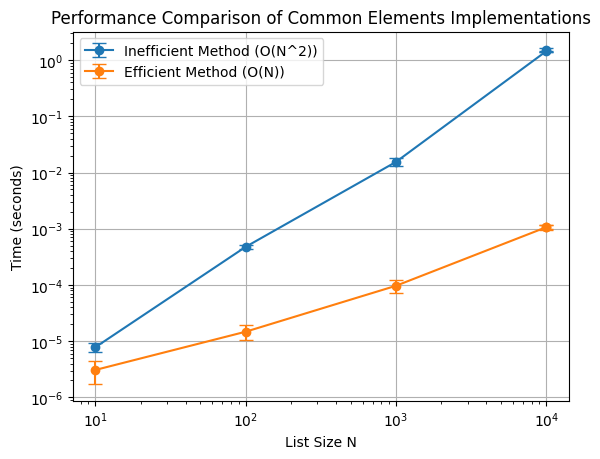

In [13]:
# Plot the results with error bars
plt.errorbar(N_values, inefficient_times_mean, yerr=inefficient_times_std, label='Inefficient Method (O(N^2))', marker='o', capsize=5)
plt.errorbar(N_values, efficient_times_mean, yerr=efficient_times_std, label='Efficient Method (O(N))', marker='o', capsize=5)

plt.xlabel('List Size N')
plt.ylabel('Time (seconds)')
plt.title('Performance Comparison of Common Elements Implementations')
plt.legend()
plt.loglog()
plt.grid(True)
plt.show()

In [3]:
efficient_times_mean

[1.1682510375976563e-06,
 7.343292236328125e-06,
 8.840560913085938e-05,
 0.0010059118270874024]

In [4]:
N_values

[10, 100, 1000, 10000, 10000]

### Exercise 1.6

Create a list of all pairs of factors (as tuples) of 362880 using list comprehension.


Note on list comprehension:

**List comprehension** is a concise way to create lists in Python. It allows you to generate a new list by applying an expression to each item in an iterable (like a list or range) in a single, readable line of code.

The syntax is:

```python
[expression for item in iterable if condition]
```

1. **Expression**: Defines the operation or transformation to apply to each item.
2. **For Loop**: Iterates over each item in the iterable.
3. **Condition (Optional)**: Filters items, only including those that meet the condition.


Example: To create a list of squares of all even numbers from 1 to 10:

```python
squares = [x**2 for x in range(1, 11) if x % 2 == 0]
print(squares)  # Output: [4, 16, 36, 64, 100]
```

This is equivalent to the following code using a traditional `for` loop:

```python
squares = []
for x in range(1, 11):
    if x % 2 == 0:
        squares.append(x**2)
```


Solution to the exercise:

In [37]:
n = 362880
factor_pairs = [(i, n // i) for i in range(1, int(n**0.5) + 1) if n % i == 0]
print(factor_pairs)


[(1, 362880), (2, 181440), (3, 120960), (4, 90720), (5, 72576), (6, 60480), (7, 51840), (8, 45360), (9, 40320), (10, 36288), (12, 30240), (14, 25920), (15, 24192), (16, 22680), (18, 20160), (20, 18144), (21, 17280), (24, 15120), (27, 13440), (28, 12960), (30, 12096), (32, 11340), (35, 10368), (36, 10080), (40, 9072), (42, 8640), (45, 8064), (48, 7560), (54, 6720), (56, 6480), (60, 6048), (63, 5760), (64, 5670), (70, 5184), (72, 5040), (80, 4536), (81, 4480), (84, 4320), (90, 4032), (96, 3780), (105, 3456), (108, 3360), (112, 3240), (120, 3024), (126, 2880), (128, 2835), (135, 2688), (140, 2592), (144, 2520), (160, 2268), (162, 2240), (168, 2160), (180, 2016), (189, 1920), (192, 1890), (210, 1728), (216, 1680), (224, 1620), (240, 1512), (252, 1440), (270, 1344), (280, 1296), (288, 1260), (315, 1152), (320, 1134), (324, 1120), (336, 1080), (360, 1008), (378, 960), (384, 945), (405, 896), (420, 864), (432, 840), (448, 810), (480, 756), (504, 720), (540, 672), (560, 648), (567, 640), (576,

Note:
In Python, `n // i` is the **floor division** operation, which divides `n` by `i` and returns the largest integer less than or equal to the result.

For example, if `n = 10` and `i = 3`:

In [32]:
10 // 3

3

In [33]:
10/3

3.3333333333333335

Here, `10 / 3` would be `3.333...`, but `10 // 3` performs floor division, returning just `3` (the integer part without rounding up).


In Python, `n % i` is the **modulus** operation, which calculates the **remainder** of the division of `n` by `i`.



If you have `n % i`, it tells you the remainder when `n` is divided by `i`:

- If `n % i == 0`, it means `i` is a divisor of `n`, as there’s no remainder (i.e., `n` is evenly divisible by `i`).
- If `n % i != 0`, it means `i` is **not** a divisor of `n`, as there’s a remainder from the division.

In [6]:
10 % 3  # Output: 1, because 10 divided by 3 has a remainder of 1

1

In [7]:
10 % 5  # Output: 0, because 10 divided by 5 has no remainder (10 is divisible by 5)

0

In the context of finding factors, `n % i == 0` checks if `i` divides `n` without a remainder, meaning `i` is a factor of `n`.

### Exercise 1.7

Write a generator function for a random walk, step size 1, which is equally likely to go up or down.  End the generator when you have total displacement of 10 steps (you will need a random number generator like random.randint(a,b) which gives a random integer between a and b inclusive, you will need to add the line import random at the top in order to use it).


Here are two solutions.

First, a step-by-step solution:

In [39]:
import random

def random_walk():
    position = 0  # Start at position 0
    step = 0  # Track the number of steps taken

    while abs(position) < 10:  # Continue until displacement of 10 steps is reached
        step += 1  # Increment step count
        move = random.randint(0, 1)  # Randomly choose between 0 (down) and 1 (up)

        if move == 1:
            position += 1  # Move up by 1 step
        else:
            position -= 1  # Move down by 1 step

        yield position  # Yield the current position at each step


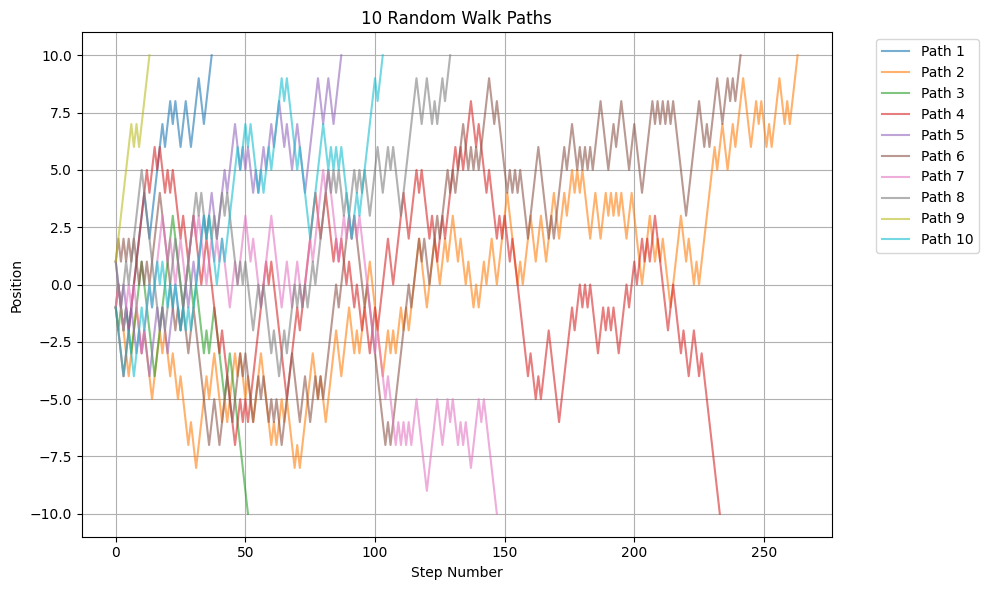

In [40]:
# Generate 10 random walk paths
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

for i in range(10):
    path = list(random_walk())
    steps = list(range(len(path)))
    plt.plot(steps, path, '-', alpha=0.6, label=f'Path {i+1}')

plt.grid(True)
plt.xlabel('Step Number')
plt.ylabel('Position')
plt.title('10 Random Walk Paths')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()



Now a more compact solution and using pandas to store and plot the paths. 

In [41]:
import random

def random_walk():
    position = 0
    while abs(position) < 10:
        position += 1 if random.randint(0, 1) else -1
        yield position


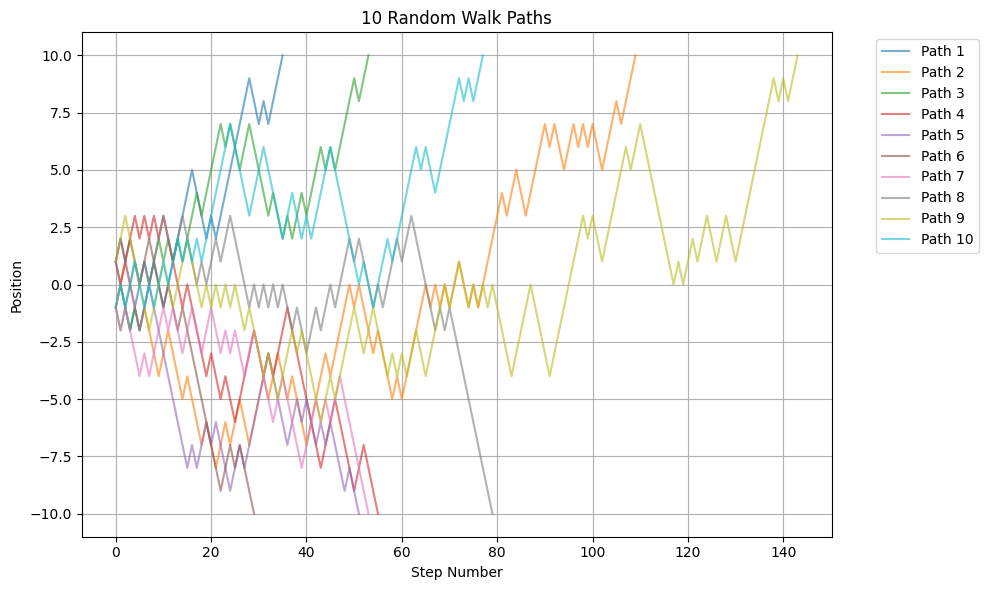

In [42]:
import pandas as pd
import matplotlib.pyplot as plt

# Generate 10 paths and store in a DataFrame
paths = []
for i in range(10):
    path = list(random_walk())
    # Pad shorter paths with None to make them equal length
    paths.append(pd.Series(path, name=f'Path {i+1}'))

df = pd.concat(paths, axis=1)

# Plot using pandas
ax = df.plot(figsize=(10,6), alpha=0.6)
plt.grid(True)
plt.xlabel('Step Number') 
plt.ylabel('Position')
plt.title('10 Random Walk Paths')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


In [43]:
df

,Path 1,Path 2,Path 3,Path 4,Path 5,Path 6,Path 7,Path 8,Path 9,Path 10
0,-1.0,-1.0,-1.0,1.0,1.0,1.0,-1.0,1.0,1,-1.0
1,0.0,0.0,-2.0,0.0,2.0,2.0,-2.0,0.0,2,0.0
2,-1.0,1.0,-1.0,1.0,1.0,1.0,-1.0,-1.0,3,-1.0
3,-2.0,0.0,-2.0,2.0,0.0,2.0,-2.0,0.0,2,0.0
4,-1.0,-1.0,-1.0,3.0,-1.0,1.0,-3.0,1.0,1,1.0
...,...,...,...,...,...,...,...,...,...,...
139,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8,NaN
140,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9,NaN
141,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8,NaN
142,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9,NaN


In [44]:
df.corr()

,Path 1,Path 2,Path 3,Path 4,Path 5,Path 6,Path 7,Path 8,Path 9,Path 10
Path 1,1.000000,-0.567622,0.686601,-0.730482,-0.613663,-0.826853,-0.533199,-0.336076,-0.729827,0.702171
Path 2,-0.567622,1.000000,-0.286677,0.136364,0.469413,0.888593,-0.140168,-0.411369,0.477485,0.077108
Path 3,0.686601,-0.286677,1.000000,-0.871641,-0.836370,-0.952139,-0.500936,0.037038,-0.464793,0.515347
Path 4,-0.730482,0.136364,-0.871641,1.000000,0.732026,0.895305,0.631696,0.230826,0.557626,-0.396987
Path 5,-0.613663,0.469413,-0.836370,0.732026,1.000000,0.814324,0.311224,-0.124824,0.352580,-0.556123
Path 6,-0.826853,0.888593,-0.952139,0.895305,0.814324,1.000000,0.078854,-0.037379,0.506029,-0.876907
Path 7,-0.533199,-0.140168,-0.500936,0.631696,0.311224,0.078854,1.000000,0.430487,0.630239,-0.092226
Path 8,-0.336076,-0.411369,0.037038,0.230826,-0.124824,-0.037379,0.430487,1.000000,-0.008174,-0.520735
Path 9,-0.729827,0.477485,-0.464793,0.557626,0.352580,0.506029,0.630239,-0.008174,1.000000,-0.149959
Path 10,0.702171,0.077108,0.515347,-0.396987,-0.556123,-0.876907,-0.092226,-0.520735,-0.149959,1.000000


In [45]:
df.cov()

,Path 1,Path 2,Path 3,Path 4,Path 5,Path 6,Path 7,Path 8,Path 9,Path 10
Path 1,12.311111,-4.634921,6.755556,-7.187302,-6.660317,-10.120690,-2.323810,-1.384127,-4.780952,5.758730
Path 2,-4.634921,21.157715,-1.971698,1.106494,3.122172,9.155172,-0.713836,-2.577215,5.366555,0.500000
Path 3,6.755556,-1.971698,9.034591,-8.971698,-6.901961,-11.695402,-3.351153,0.156184,-2.944444,3.319706
Path 4,-7.187302,1.106494,-8.971698,12.867532,7.167421,10.603448,4.814465,1.150649,4.142857,-3.101299
Path 5,-6.660317,3.122172,-6.901961,7.167421,8.491704,11.143678,1.782805,-0.518854,2.196078,-3.478130
Path 6,-10.120690,9.155172,-11.695402,10.603448,11.143678,16.488506,0.293103,-0.166667,2.614943,-8.224138
Path 7,-2.323810,-0.713836,-3.351153,4.814465,1.782805,0.293103,4.953529,1.344165,2.956324,-0.439902
Path 8,-1.384127,-2.577215,0.156184,1.150649,-0.518854,-0.166667,1.344165,6.572152,-0.040506,-3.045455
Path 9,-4.780952,5.366555,-2.944444,4.142857,2.196078,2.614943,2.956324,-0.040506,11.361111,-0.802697
Path 10,5.758730,0.500000,3.319706,-3.101299,-3.478130,-8.224138,-0.439902,-3.045455,-0.802697,7.549950


## Geometric Brownian motion simulations

Geometric Brownian motion is a stochastic process that grows multiplicatively. It follows the stochastic differential equation (SDE):

$$
    dY(t) = \mu Y(t) \, dt + \sigma Y(t) \, dB(t)
$$
where $B(t)$ is called a *Brownian motion*, $\mu$ is the *drift*, and $\sigma$ is the *diffusion* coefficient. The solution to this equation is given by (derive it at home):

$$
    Y(t) = Y_0 \exp\left(\left(\mu - \frac{\sigma^2}{2}\right)t + \sigma B(t)\right)
$$
where $Y_0 = Y(0)$. 

Create a Python package that contains a function to simulate the Geometric Brownian motion. Call the package `pygbm`. It must contain classes (base class and derived classes) and methods, and a command-line interface must be implemented.

For instance, one should be able to run the following Python code and show a plot of a simulated path:

```python
from pygbm.gbm_simulator import GBMSimulator
import matplotlib.pyplot as plt

# Parameters for GBM
y0 = 1.0
mu = 0.05
sigma = 0.2
T = 1.0
N = 100

# Initialize simulator
simulator = GBMSimulator(y0, mu, sigma)

# Simulate path
t_values, y_values = simulator.simulate_path(T, N)

# Plot the simulated path
plt.plot(t_values, y_values, label="GBM Path")
plt.xlabel("Time")
plt.ylabel("Y(t)")
plt.title("Simulated Geometric Brownian Motion Path")
plt.legend()
plt.show()
```

For the command-line interface, one should be able to run something like:

```bash
pygbm simulate --y0 1.0 --mu 0.05 --sigma 0.2 --T 1.0 --N 100 --output gbm_plot.png
```

This command should produce a plot of the simulated path as an output.

Solution:

See [here](https://github.com/borisbolliet/pygbm_package) for the package. 

Usage:

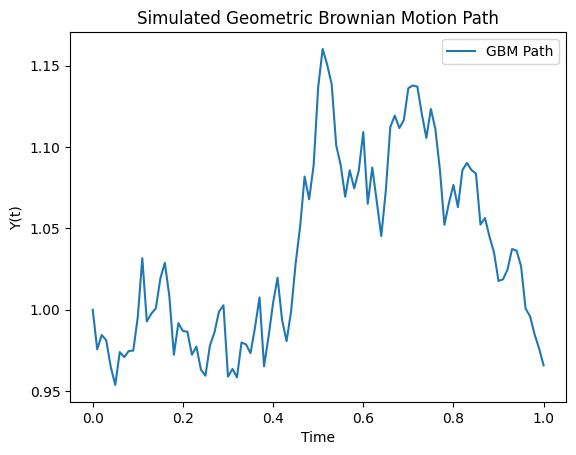

In [47]:
from pygbm.gbm_simulation import GBMSimulator
simulator = GBMSimulator(y0=1.0, mu=0.05, sigma=0.2)
t_values, y_values = simulator.simulate_path(T=1.0, N=100)
simulator.plot_path(t_values, y_values)

**Optional extension**: Assuming you based your code on the analytical solution, extend your package so it solves the SDE numerically using:

1. The [Euler-Maruyama method](https://en.wikipedia.org/wiki/Euler%E2%80%93Maruyama_method)
2. The [Milstein method](https://en.wikipedia.org/wiki/Milstein_method)

Compare the results with the analytical solution and discuss.

See [here](https://github.com/borisbolliet/sde_simulation/blob/master/sde_simulation.ipynb) for tips for extension solution.